<a href="https://colab.research.google.com/github/0-SHINN/data-analysis-projects/blob/main/game-balance-analysis/code/balance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 로드 및 기본 탐색

In [3]:
stats = pd.read_csv("stats.csv")
stats.head()

,average_margin,average_position,average_vp,average_winner_vp,count,expected_wins,faction,final_scoring,high_score_game,high_score_player,high_score_time,high_score_vp,map,min_rating,player_count,start_position,wins
0,57.000000,4,309,337,2,0.666667,alchemists,expansion,Wargames52,BravePawn,2017-03-30 19:36:16,189,be8f6ebf549404d015547152d5f2a1906ae8dd90,0,3,middle,1.000000
1,28.666667,2,145,155,1,0.250000,darklings,expansion,gareth45,Lachlan,2014-05-12 12:12:43,145,30b6ded823e53670624981abdb2c5b8568a44091,0,4,last,0.000000
2,-36.500000,50,2978,3498,25,8.333333,mermaids,original,4pLeague_S8_D6L5_G7,koralgol,2015-09-12 09:41:11,159,126fe960806d587c78546b30f1a90853b1ada468,0,3,first,8.333333
3,9.000000,10,466,511,4,1.000000,darklings,original,TourRulesFeI02,vanmorrison,2017-03-20 19:41:33,124,be8f6ebf549404d015547152d5f2a1906ae8dd90,0,4,second,1.000000
4,-14.000000,2,135,149,1,0.500000,giants,expansion,CEE008,Favela,2017-10-15 21:28:54,135,fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1,0,2,last,0.000000


## EDA

In [4]:
# non nulll값과 데이터 타입 확인
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74377 entries, 0 to 74376
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   average_margin     74377 non-null  float64
 1   average_position   74377 non-null  int64  
 2   average_vp         74377 non-null  int64  
 3   average_winner_vp  74377 non-null  int64  
 4   count              74377 non-null  int64  
 5   expected_wins      74377 non-null  float64
 6   faction            74377 non-null  object 
 7   final_scoring      74377 non-null  object 
 8   high_score_game    74377 non-null  object 
 9   high_score_player  74353 non-null  object 
 10  high_score_time    74377 non-null  object 
 11  high_score_vp      74377 non-null  int64  
 12  map                74377 non-null  object 
 13  min_rating         74377 non-null  int64  
 14  player_count       74377 non-null  int64  
 15  start_position     74377 non-null  object 
 16  wins               743

In [5]:
# 결측값 확인
stats.isnull().sum()

,0
average_margin,0
average_position,0
average_vp,0
average_winner_vp,0
count,0
expected_wins,0
faction,0
final_scoring,0
high_score_game,0
high_score_player,24


In [6]:
# 중복값 확인
stats.duplicated().sum()

np.int64(0)

In [7]:
print("===============진영 목록===============")
print(stats['faction'].unique())
print("===============맵 목록===============")
print(stats['map'].unique())
print("===============진행 순서===============")
print(stats['start_position'].unique())

===============진영 목록===============
['alchemists' 'darklings' 'mermaids' 'giants' 'halflings' 'fakirs'
 'engineers' 'chaosmagicians' 'dwarves' 'acolytes' 'swarmlings' 'auren'
 'nomads' 'cultists' 'riverwalkers_v5' 'witches' 'dragonlords'
 'icemaidens' 'shapeshifters_v5' 'yetis']
===============맵 목록===============
['be8f6ebf549404d015547152d5f2a1906ae8dd90'
 '30b6ded823e53670624981abdb2c5b8568a44091'
 '126fe960806d587c78546b30f1a90853b1ada468'
 'fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1'
 '95a66999127893f5925a5f591d54f8bcb9a670e6'
 '91645cdb135773c2a7a50e5ca9cb18af54c664c4'
 '224736500d20520f195970eb0fd4c41df040c08c'
 '735b073fd7161268bb2796c1275abda92acd8b1a'
 'c07f36f9e050992d2daf6d44af2bc51dca719c46'
 'b109f78907d2cbd5699ced16572be46043558e41']
===============진행 순서===============
['middle' 'last' 'first' 'second' 'second-to-last']


## 데이터 전처리

In [8]:
#맵 이름 변경
map_dict = {
    'be8f6ebf549404d015547152d5f2a1906ae8dd90': 'Map_1',
    '30b6ded823e53670624981abdb2c5b8568a44091': 'Map_2',
    '126fe960806d587c78546b30f1a90853b1ada468': 'Map_3',
    'fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1': 'Map_4',
    '95a66999127893f5925a5f591d54f8bcb9a670e6': 'Map_5',
    '91645cdb135773c2a7a50e5ca9cb18af54c664c4': 'Map_6',
    '224736500d20520f195970eb0fd4c41df040c08c': 'Map_7',
    '735b073fd7161268bb2796c1275abda92acd8b1a': 'Map_8',
    'c07f36f9e050992d2daf6d44af2bc51dca719c46': 'Map_9',
    'b109f78907d2cbd5699ced16572be46043558e41': 'Map_10'
}

stats['map'] = stats['map'].map(map_dict)

## 분석 및 시각화 함수 정의

In [9]:
# 결과 테이블 생성 함수: 그룹별 승률, 픽률, 평균 VP 계산
def create_result_table(df, cols):
    total_games = df['count'].sum()
    result = df.groupby(cols).agg({'wins':'sum','count':'sum','average_vp':'mean'}).reset_index()
    result['win_rate'] = (result['wins'] / result['count'] * 100).round(2)
    result['pick_rate'] = (result['count'] / total_games * 100).round(2)
    result = result[result['count'] >= 500]
    result = result.sort_values('win_rate', ascending=False).reset_index(drop=True)
    return result

In [10]:
# 단일 범주 기준으로 여러 지표를 시각화하는 바 차트 함수
def simple_chart(df, category, metrics):
  fig, axes = plt.subplots(1, len(metrics), figsize=(6 * len(metrics), 6))

  for i in range(len(metrics)):
        col = metrics[i][0]
        ylabel = metrics[i][1]
        fmt = metrics[i][2]
        bar_label_rot = metrics[i][3]
        tick_rot = metrics[i][4]

        # 지정된 컬럼 기준으로 내림차순 정렬
        df_sorted = df.sort_values(col, ascending=False)
        # 수직 막대 그래프 생성
        bars = axes[i].bar(df_sorted[category], df_sorted[col])

        axes[i].set_title(f"{ylabel} by {category}")
        axes[i].set_ylabel(ylabel)
        axes[i].tick_params(axis='x', rotation=tick_rot)
        axes[i].bar_label(bars, fmt=fmt, padding=5, rotation=bar_label_rot)
        axes[i].set_ylim(0, df_sorted[col].max() * 1.15)

  plt.tight_layout()
  plt.show()

In [11]:
# 두 범주 조합별 상위/하위 N개 항목 시각화 함수
def cross_chart(df, cols, top_n=10):
  fig, axes = plt.subplots(1, 2, figsize=(18, 6))
  metrics = [('win_rate', '%.1f%%'), ('average_vp', '%.1f')]

  for i in range(len(metrics)):
        metric = metrics[i][0]
        fmt = metrics[i][1]

        # 지정된 컬럼 기준으로 내림차순 정렬
        df_sorted = df.sort_values(metric, ascending=False)
        # 상위 N개 데이터 추출
        top = df_sorted.head(top_n)
        # 하위 N개 데이터 추출
        bottom = df_sorted.tail(top_n)

        # 라벨 문자열 생성
        top_labels = top[cols[0]] + " | " + top[cols[1]]
        bot_labels = bottom[cols[0]] + " | " + bottom[cols[1]]

        # 수평 막대 그래프 생성
        bars1 = axes[i].barh(top_labels, top[metric], color='C3', label=f'Top {top_n}')
        bars2 = axes[i].barh(bot_labels, bottom[metric], color='C0', label=f'Bottom {top_n}')

        axes[i].set_title(f"{metric.replace('_', ' ').title()} by {cols[0].title()} x {cols[1].title()}")
        axes[i].invert_yaxis()
        axes[i].legend(loc='lower right')
        axes[i].bar_label(bars1, fmt=fmt, padding=2, label_type='edge')
        axes[i].bar_label(bars2, fmt=fmt, padding=2, label_type='edge')
        axes[i].set_xlim(0, top[metric].max() * 1.15)

  plt.tight_layout()
  plt.show()

## 단일 분석

### 테이블 생성

In [12]:
# 진영
faction_stats = create_result_table(stats, ['faction'])
faction_stats

,faction,wins,count,average_vp,win_rate,pick_rate
0,darklings,15729.000000,43420,1132.582329,36.23,11.81
1,chaosmagicians,11675.666667,37110,969.875132,31.46,10.09
2,swarmlings,8219.333333,26247,758.826928,31.32,7.14
3,mermaids,9948.500000,31853,805.309058,31.23,8.66
4,engineers,7579.666667,24300,721.333651,31.19,6.61
5,cultists,5327.833333,17146,536.902539,31.07,4.66
6,riverwalkers_v5,1294.666667,4168,217.801483,31.06,1.13
7,witches,9007.333333,29849,815.963061,30.18,8.12
8,icemaidens,2042.000000,6947,273.424177,29.39,1.89
9,acolytes,1031.000000,3694,201.232159,27.91,1.00


In [13]:
# 진행 순서
start_position_stats = create_result_table(stats, ['start_position']).drop(columns='pick_rate')
start_position_stats

,start_position,wins,count,average_vp,win_rate
0,first,35601.166667,108749,617.036149,32.74
1,middle,9764.500000,31060,421.651047,31.44
2,last,33927.666667,108749,600.857269,31.20
3,second,14879.833333,59599,706.708116,24.97
4,second-to-last,14575.833333,59599,694.738649,24.46


### 시각화

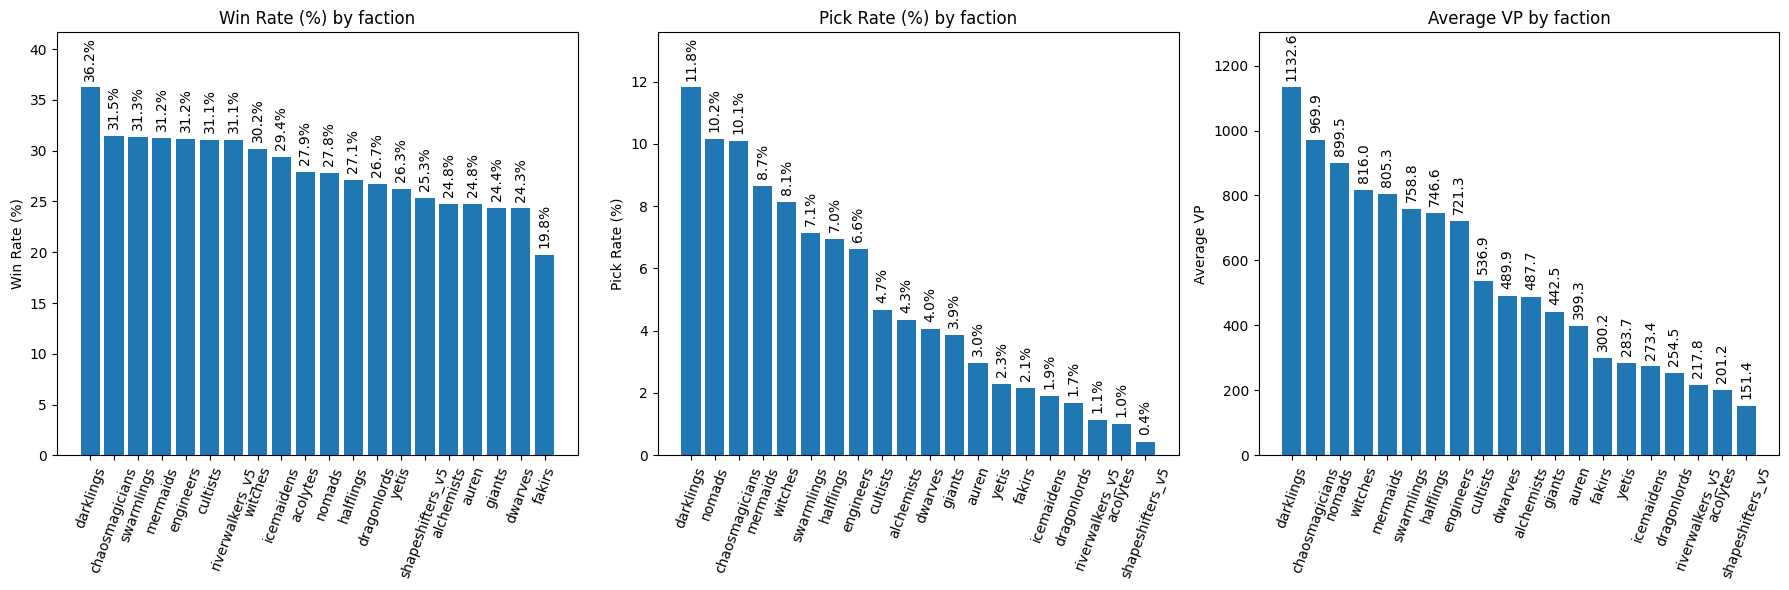

In [14]:
# 진영별 승률, 픽률, 평균 VP
simple_chart(faction_stats, 'faction', [
        ('win_rate', 'Win Rate (%)', '%.1f%%', 90, 70),
        ('pick_rate', 'Pick Rate (%)', '%.1f%%', 90, 70),
        ('average_vp', 'Average VP', '%.1f', 90, 70)
    ]
)

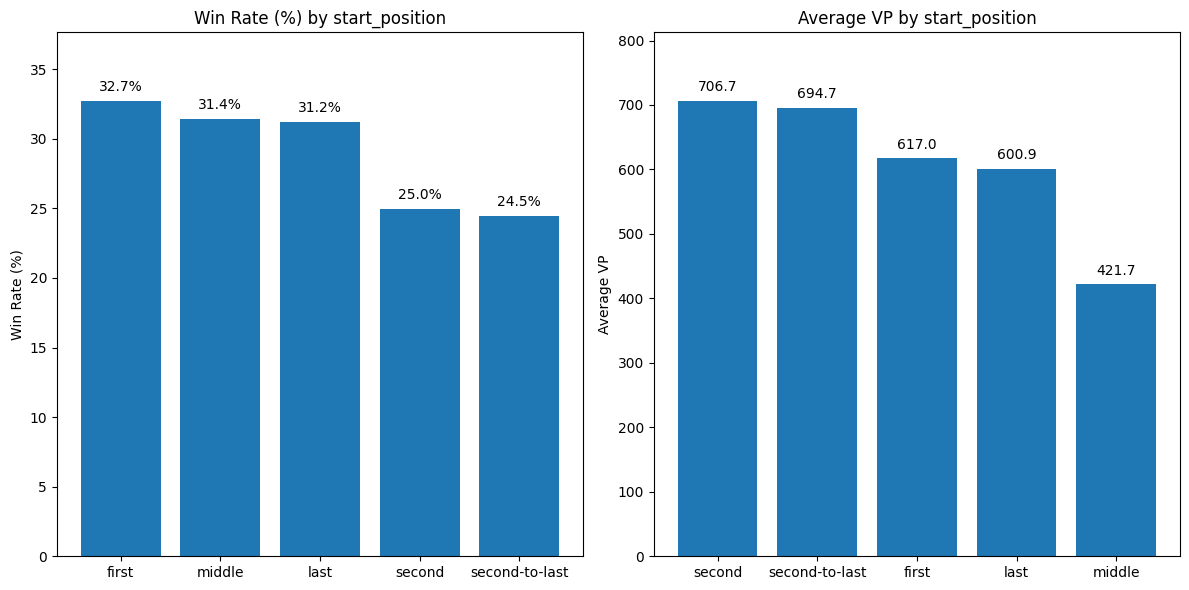

In [15]:
# 진행 순서별 승률, 평균 VP
simple_chart(start_position_stats, 'start_position', [
    ('win_rate', 'Win Rate (%)', '%.1f%%', 0, 0),
    ('average_vp', 'Average VP', '%.1f', 0, 0)
])

## 교차 분석

### 테이블 생성

In [16]:
# 진영 x 맵
faction_map = create_result_table(stats, ['faction', 'map']).drop(columns='pick_rate')
faction_map

,faction,map,wins,count,average_vp,win_rate
0,swarmlings,Map_1,1291.333333,3133,332.642173,41.22
1,mermaids,Map_1,1692.500000,4142,406.986735,40.86
2,chaosmagicians,Map_5,1844.833333,4778,451.778421,38.61
3,darklings,Map_3,12689.000000,34396,2438.766156,36.89
4,mermaids,Map_5,1826.500000,5087,459.891123,35.91
5,darklings,Map_5,1664.666667,4763,435.542996,34.95
6,witches,Map_1,1088.833333,3138,329.383306,34.70
7,swarmlings,Map_5,1200.500000,3468,375.152627,34.62
8,nomads,Map_5,1793.833333,5356,458.903356,33.49
9,witches,Map_5,1362.666667,4187,410.692895,32.55


In [17]:
# 진영 x 진행 순서
faction_sp = create_result_table(stats, ['faction', 'start_position']).drop(columns='pick_rate')
faction_sp

,faction,start_position,wins,count,average_vp,win_rate
0,darklings,middle,1261.500000,3213,662.852665,39.26
1,darklings,first,6634.166667,17276,1467.486469,38.40
2,darklings,last,3312.000000,8819,805.338483,37.56
3,riverwalkers_v5,first,425.000000,1178,221.718615,36.08
4,swarmlings,first,3185.000000,8990,823.995658,35.43
...,...,...,...,...,...,...
87,alchemists,second-to-last,392.500000,2220,497.932540,17.68
88,auren,second-to-last,282.000000,1647,424.423256,17.12
89,alchemists,second,416.500000,2458,512.998158,16.94
90,fakirs,second-to-last,175.333333,1225,325.741259,14.31


In [18]:
# 맵 x 진행 순서
map_sp = create_result_table(stats, ['map', 'start_position']).drop(columns='pick_rate')
map_sp

,map,start_position,wins,count,average_vp,win_rate
0,Map_1,first,4985.666667,14475,301.727403,34.44
1,Map_5,first,6085.000000,18379,359.756974,33.11
2,Map_1,last,4731.666667,14475,293.956508,32.69
3,Map_5,last,5979.333333,18379,351.381561,32.53
4,Map_4,first,439.500000,1355,149.259478,32.44
5,Map_3,first,24081.000000,74524,1139.977523,32.31
6,Map_3,middle,6050.833333,19135,692.824186,31.62
7,Map_1,middle,1549.333333,4953,251.039557,31.28
8,Map_4,last,417.833333,1355,146.141196,30.84
9,Map_5,middle,1995.333333,6476,291.171479,30.81


### 시각화

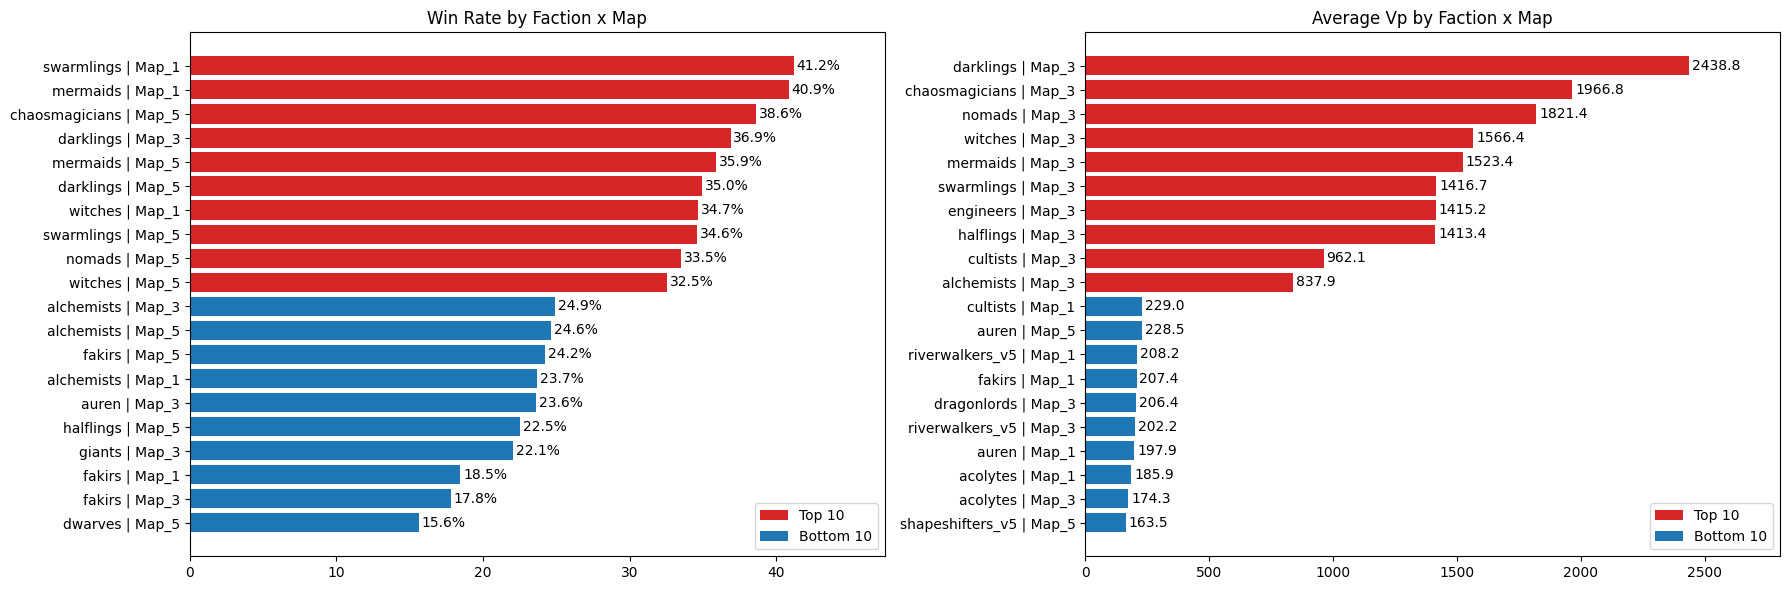

In [19]:
# 진영 x 맵
cross_chart(faction_map, ['faction', 'map'])

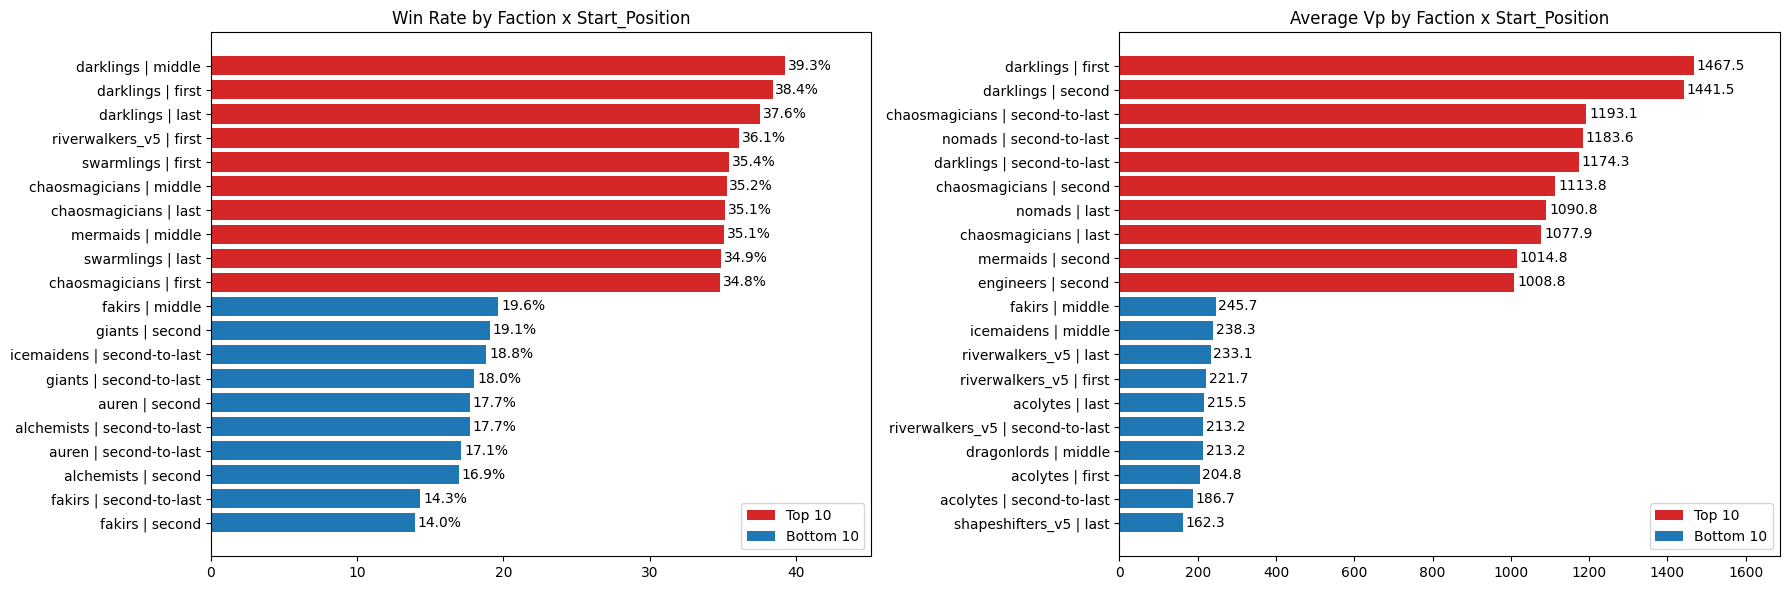

In [20]:
# 진영 x 진행 순서
cross_chart(faction_sp, ['faction', 'start_position'])

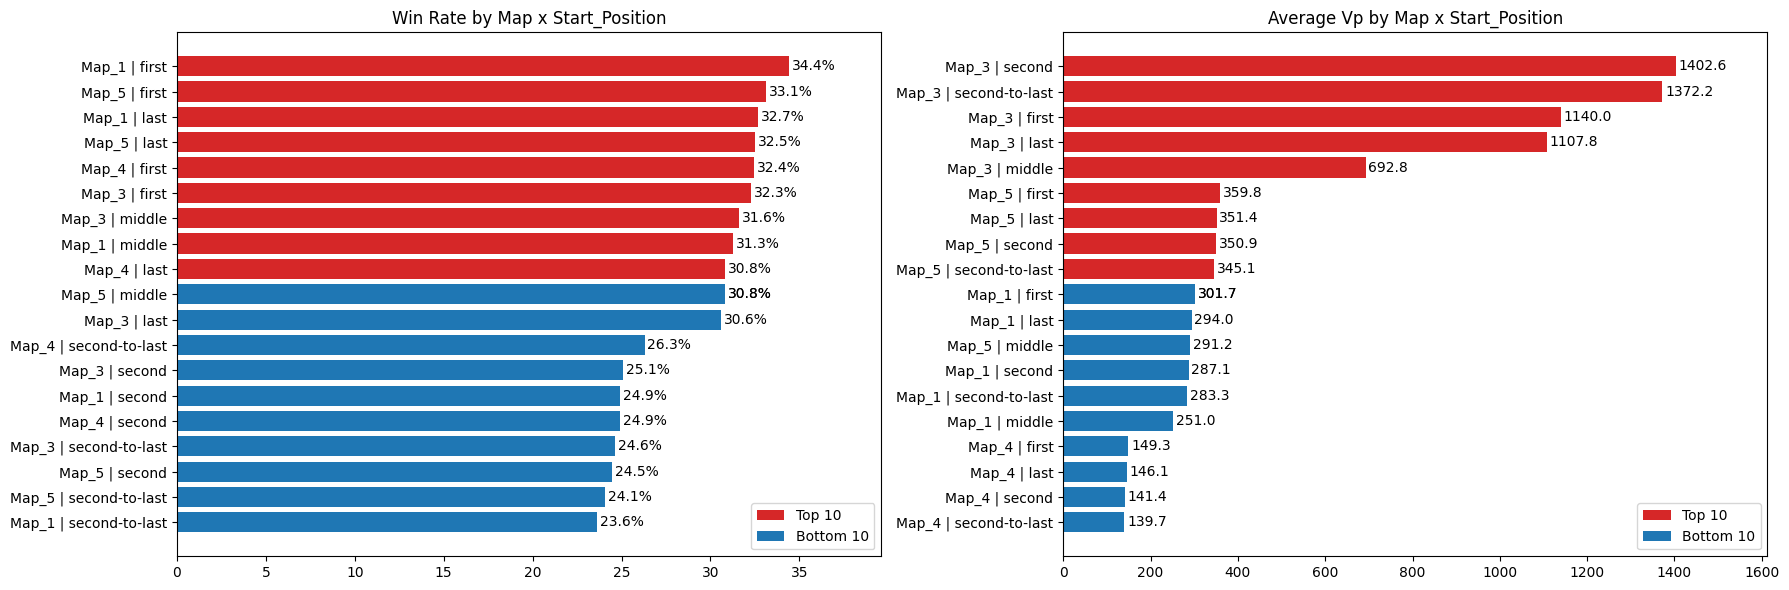

In [21]:
# 맵 x 진행 순서
cross_chart(map_sp, ['map', 'start_position'])

## 추가 분석

In [22]:
# riverwalkers_v5의 진행 순서별 승률 분석
faction_sp[faction_sp['faction'] == 'riverwalkers_v5']

,faction,start_position,wins,count,average_vp,win_rate
3,riverwalkers_v5,first,425.000000,1178,221.718615,36.08
28,riverwalkers_v5,last,459.833333,1477,233.136196,31.13
68,riverwalkers_v5,second-to-last,142.833333,609,213.242690,23.45
